# Handwriting Extraction

## Group members
- Conor Rogers C16347693
- James Behan C17348016
- Monika Adamczewska C16478646

# Description 

# Method

# Testing

# Conclusion 

# References

Imports

In [2]:
import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

Selecting an image

In [29]:
f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
I = cv2.imread(f)
Original = I.copy()

Checking an image as been selected

In [30]:
if I is None:
    print('Invalid input')
    sys.exit(0)

In [31]:
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) 

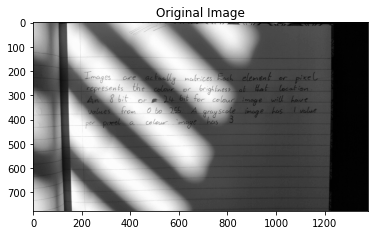

In [32]:
plt.title('Original Image')
plt.imshow(G, cmap = "gray") 
plt.show()

In [54]:
B =cv2.adaptiveThreshold(G, maxValue= 255,adaptiveMethod= cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                         thresholdType= cv2.THRESH_BINARY,blockSize= 23,C = 10)

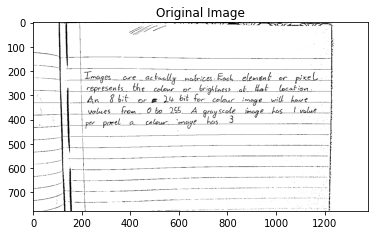

In [55]:
plt.title('Original Image')
plt.imshow(B, cmap = "gray") 
plt.show()

In [56]:
cv2.imshow("image", B)
key = cv2.waitKey(0)
cv2.destroyAllWindows()